In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Pre Processing






In [ ]:
initial_dataset = pd.read_csv('/content/drive/MyDrive/datasets/new_model.csv')
initial_dataset.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [ ]:
initial_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [ ]:
initial_dataset.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [ ]:
initial_dataset.shape 

(400, 14)

In [ ]:
#statistical measures about the data
initial_dataset.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


Visualisation











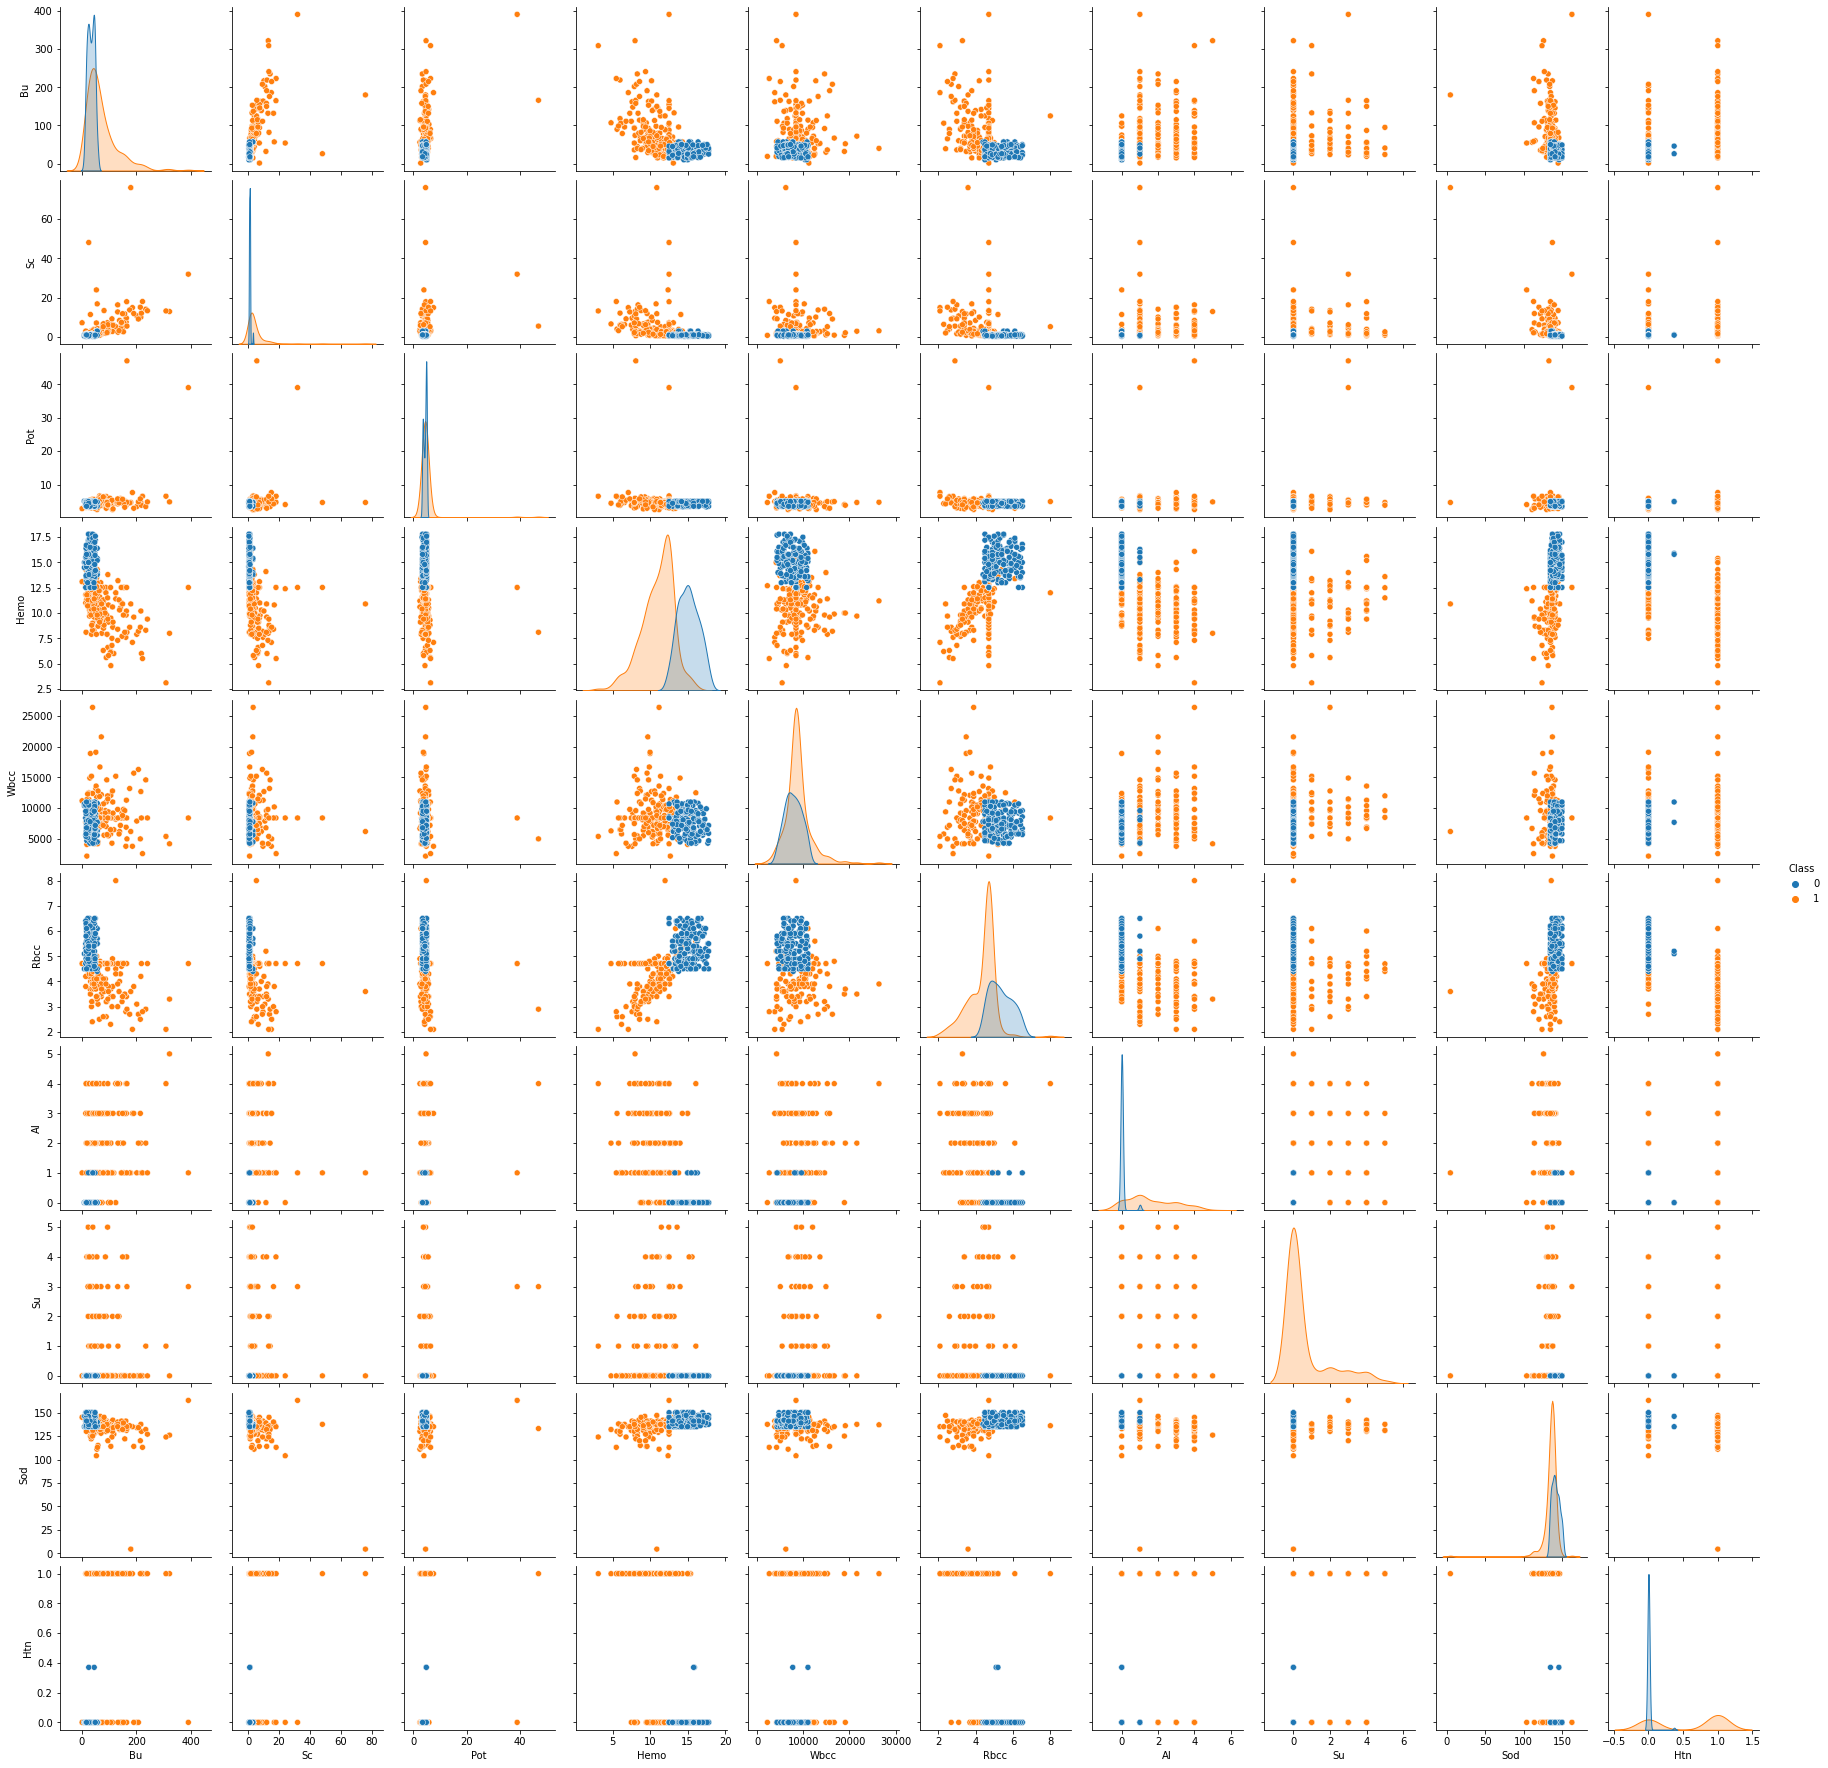

In [ ]:
col = ["Bu","Sc","Pot","Hemo","Wbcc","Rbcc","Al","Su","Sod","Htn","Class"] 
sns.pairplot(initial_dataset[col],hue="Class") 

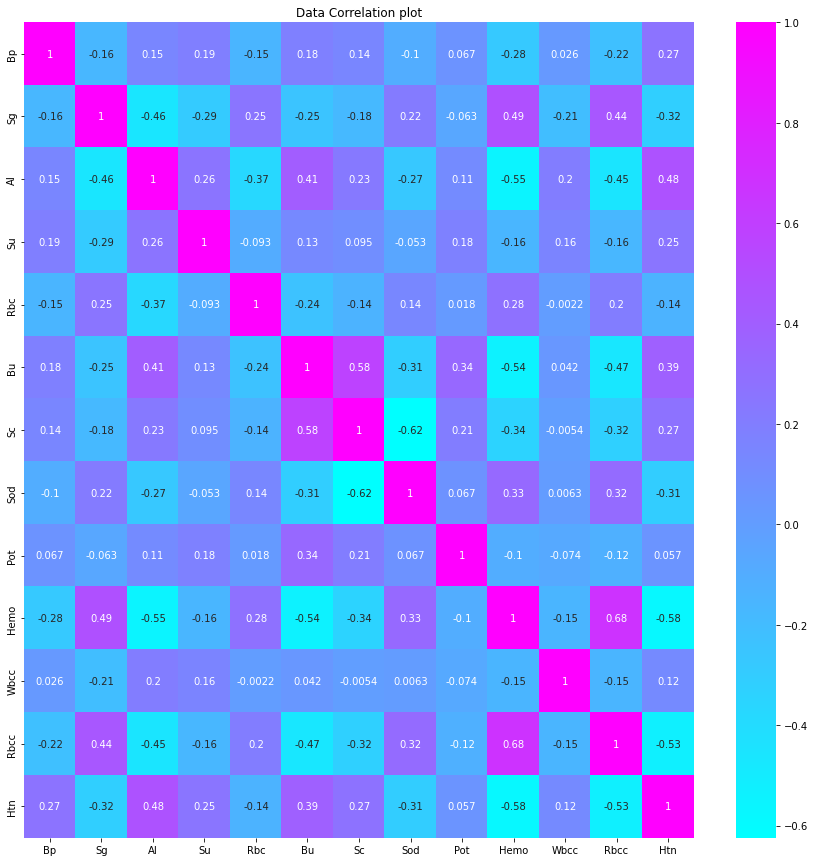

In [ ]:
# Using Heatmap to show correlation between features
keep_features = initial_dataset.drop(initial_dataset.columns[-1],axis=1)
fig = plt.figure(figsize=(15, 15))
corr_plot = sns.heatmap(keep_features.corr(),annot = True, cmap = 'cool' ) 
plt.title("Data Correlation plot")
plt.show()

In [ ]:
#checking the distribution
initial_dataset["Class"].value_counts()
#0---- Healthy Kidney
#1-----defected kidney

1    250
0    150
Name: Class, dtype: int64

## SPLIT DATA AND TRAIN

In [ ]:
from sklearn.model_selection import train_test_split
X = initial_dataset.drop(['Class'], axis = 1)
Y = initial_dataset[['Class']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
dtypes: float64(13)
memory usage: 40.8 KB


In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   400 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(400, 13) (280, 13) (120, 13)


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()



In [ ]:
model.fit(X_train, Y_train)
X_test_prediction= model.predict(X_test)
#print(X_test_prediction)
LogR = accuracy_score(X_test_prediction,Y_test)*100
print("Accuracy on test data:" , LogR)


# #Accuracy of training data
# X_train_prediction= model.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
# print("Accuracy on training data:" , training_data_accuracy)
# #Accuracy of test data



Accuracy on test data: 94.16666666666667


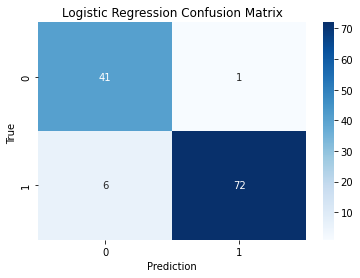

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("True ")
plt.title("Logistic Regression Confusion Matrix");

# Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier()
clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
DTC = score*100
print("Decision Tree Classifier Accuracy :", score*100)

Decision Tree Classifier Accuracy : 97.5


In [ ]:
x = clf.predict(X_test)
#print(x)

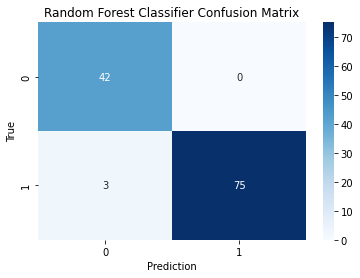

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, x), annot=True, cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Random Forest Classifier Confusion Matrix");

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
RF.score(X_train,Y_train)

1.0

In [ ]:
RF.score(X_test,Y_test)
RFC= RF.score(X_test,Y_test)*100
x=RF.predict(X_test)

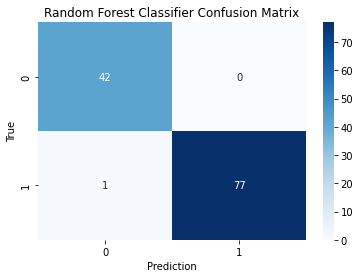

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test, x), annot=True, cmap='Blues')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Random Forest Classifier Confusion Matrix");

## KNeighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3) 
KNN_model.fit(X,Y.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [ ]:
score=KNN_model.score(X,Y)
KNN=score*100
print('KNeighborsClassifier accuracy:', score*100)


KNeighborsClassifier accuracy: 86.0


In [ ]:
x= KNN_model.predict(X_test)
#print(x)

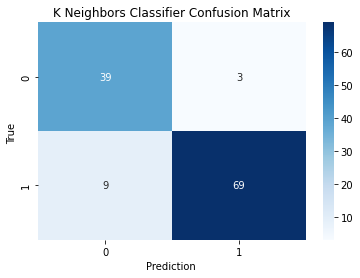

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
plt.figure()
sns.heatmap(confusion_matrix(Y_test,  x), annot=True, cmap='Blues')
plt.xlabel("Prediction ")
plt.ylabel("True ")
plt.title("K Neighbors Classifier Confusion Matrix");

# Analysis


99.16666666666667
Highest accuracy: 99.16666666666667


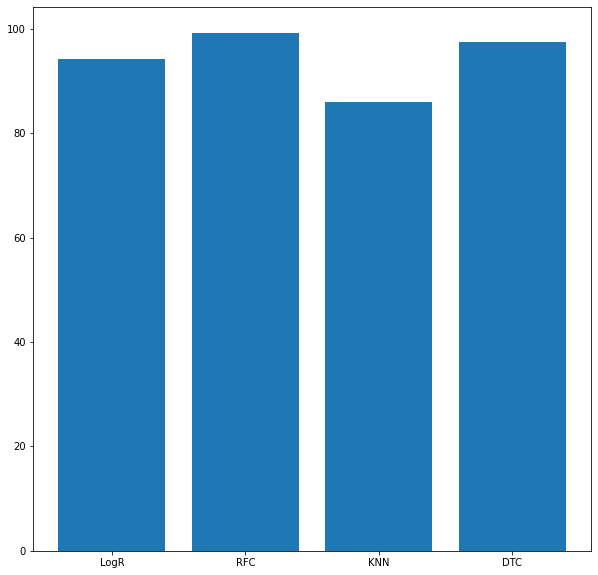

In [ ]:
plt.figure(figsize=(10,10))
col=[LogR,RFC,KNN,DTC]
max_val = max(col)
#print(max_val)
name=['LogR','RFC','KNN','DTC']
print('Highest accuracy:',max_val)
plt.bar(x = name, height = col)
plt.show()
